In [50]:
from comet_ml import Experiment
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



## Загружаекм данные

In [51]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Выделение признаков для дальнейшего анализа

In [52]:
numeric_data = df.drop(columns=['PatientId', 'AppointmentID','ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)


In [53]:
# Преобразуем Gender в числовой формат (например, F = 0, M = 1)
numeric_data['Gender'] = numeric_data['Gender'].map({'F': 0, 'M': 1})

# Преобразуем No-show в числовой формат (например, No = 0, Yes = 1)
numeric_data['No-show'] = numeric_data['No-show'].map({'No': 0, 'Yes': 1})
# Проверим результат
numeric_data

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,0,1,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,0
110523,0,51,0,0,0,0,0,1,0
110524,0,21,0,0,0,0,0,1,0
110525,0,38,0,0,0,0,0,1,0


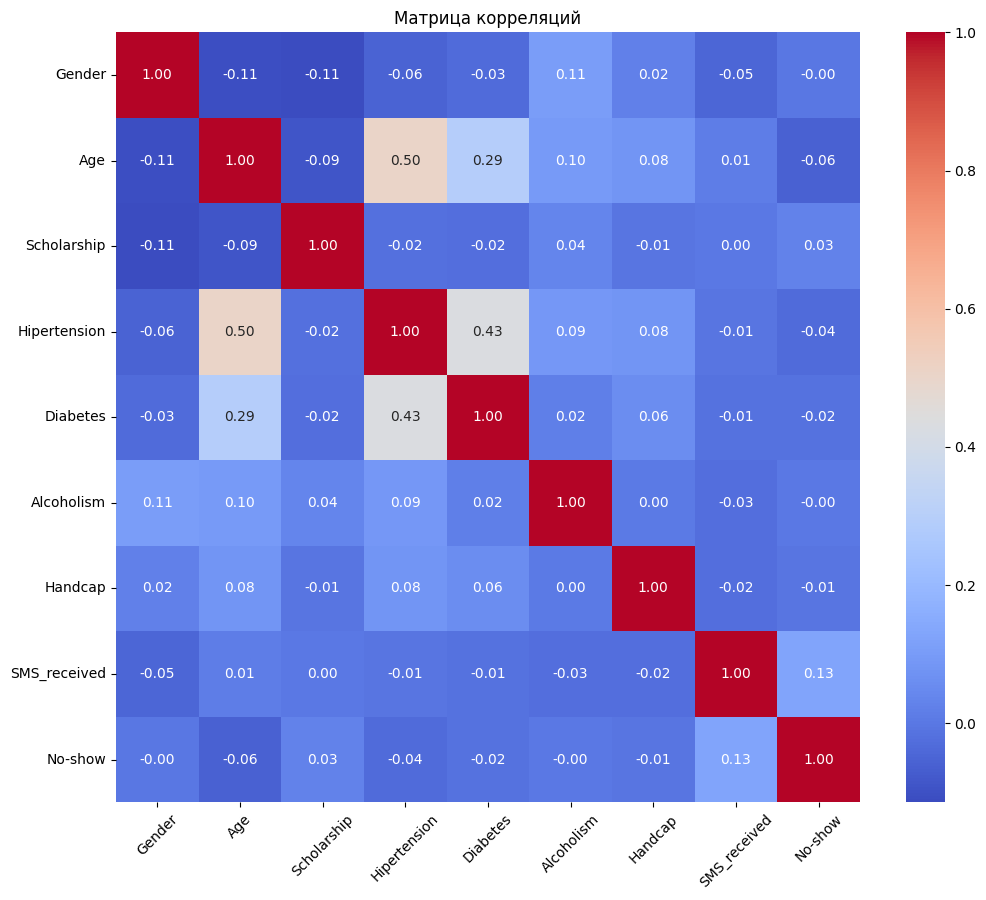

COMET INFO: The process of logging environment details (conda environment, git patch) is underway. Please be patient as this may take some time.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : estimated_stem_9556
COMET INFO:     url                   : https://www.comet.com/chertt007/ilya-skillfactory-project-medical-appointment/03df342c33454ca59d49c0a6d4dd0c26
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.04 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook               

In [54]:
experiment = Experiment(
  api_key="itFKoifJNhhOeaU8zW5h5qkwl",
  project_name="ilya-skillfactory-project-medical-appointment",
  workspace="chertt007"
)

plt.figure(figsize=(12, 10)) 
sns.heatmap(numeric_data.corr(numeric_only=True), 
            annot=True,              
            fmt=".2f",              
            cmap='coolwarm',          
            cbar=True,             
            annot_kws={"size": 10})  
plt.xticks(rotation=45)               
plt.yticks(rotation=0)               
plt.title('Матрица корреляций')      
experiment.log_figure(figure_name="Матрица корреляций", figure=plt)
plt.show()
experiment.end()

